In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
cash = pd.read_csv('/Users/anastasiatkaceva/Desktop/IronHack2024/LABs/lab_9/project_dataset/cash_request.csv')

In [48]:
cash.sample(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,recovery_status,reco_creation,reco_last_update,created_month,reimbursement_month,updated_month,created_day_of_week,days_to_reimburse,time_of_day,hour_created
6687,16116,100.0,rejected,2020-09-14 20:34:30.958284+00:00,2020-09-15 08:09:13.415951+00:00,13114.0,NaT,NaN,NaT,NaT,...,NaN,NaT,NaT,2020-09,NaT,2020-09,Monday,NaN,evening,20
18286,25349,100.0,money_back,2020-10-27 18:13:45.182719+00:00,2020-12-18 13:11:36.804460+00:00,25036.0,NaT,NaN,2020-11-05 22:00:00+00:00,2020-10-29,...,NaN,NaT,NaT,2020-10,2020-11,2020-12,Tuesday,9.0,evening,18
7066,639,100.0,money_back,2020-02-08 07:26:09.137094+00:00,2020-11-04 12:55:28.583027+00:00,2152.0,NaT,NaN,2020-03-29 22:00:00+00:00,2020-02-10,...,NaN,NaT,NaT,2020-02,2020-03,2020-11,Saturday,50.0,morning,7
16206,15615,100.0,money_back,2020-09-10 21:05:22.689700+00:00,2020-12-18 13:10:48.326506+00:00,34728.0,NaT,NaN,NaT,2020-09-12,...,NaN,NaT,NaT,2020-09,NaT,2020-12,Thursday,NaN,night,21
7805,738,100.0,money_back,2020-02-26 18:28:55.853729+00:00,2020-11-04 12:55:32.495492+00:00,73.0,NaT,NaN,2020-03-02 23:00:00+00:00,2020-02-28,...,NaN,NaT,NaT,2020-02,2020-03,2020-11,Wednesday,5.0,evening,18


In [4]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

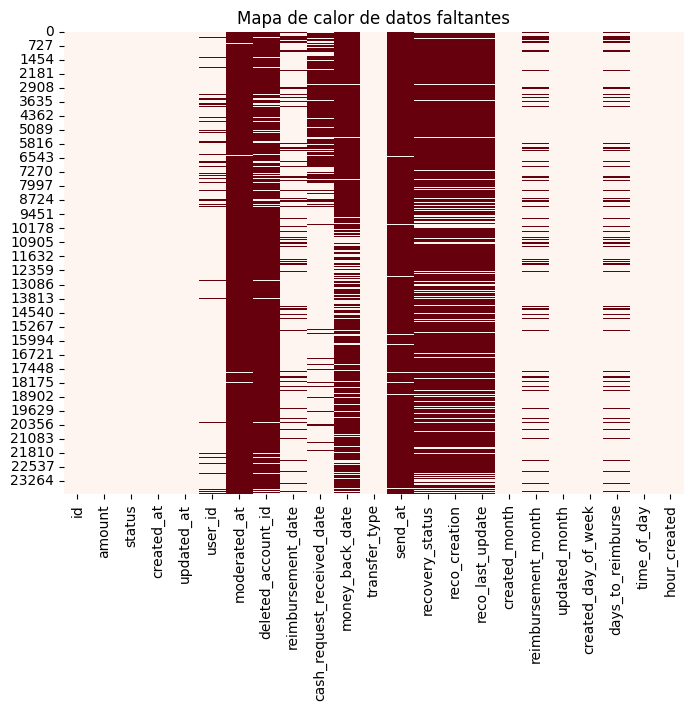

In [28]:
cash = pd.DataFrame(cash)

# Crear un mapa de calor de los datos faltantes
plt.figure(figsize=(8, 6))
sns.heatmap(cash.isnull(), cmap='Reds', cbar=False)
plt.title('Mapa de calor de datos faltantes')
plt.show()

In [6]:
# Obtener los conteos de valores para todas las columnas
for column in cash.columns:
    print("Value counts for column", column, ":")
    print(cash[column].value_counts())
    print()

Value counts for column id :
id
5        1
15322    1
19569    1
15338    1
15329    1
        ..
1196     1
516      1
991      1
165      1
19886    1
Name: count, Length: 23970, dtype: int64

Value counts for column amount :
amount
100.0    16094
50.0      5304
25.0      1276
80.0       267
60.0       190
70.0       151
20.0       132
30.0       114
40.0       100
90.0        91
10.0        57
200.0       25
95.0        21
1.0         19
75.0        18
45.0        15
55.0        14
65.0        12
99.0        12
15.0        10
85.0         9
35.0         9
5.0          6
2.0          3
98.0         2
28.0         2
22.0         2
11.0         2
49.0         1
36.0         1
54.0         1
39.0         1
97.0         1
8.0          1
86.0         1
94.0         1
67.0         1
72.0         1
31.0         1
150.0        1
24.0         1
Name: count, dtype: int64

Value counts for column status :
status
money_back               16397
rejected                  6568
direct_debit_rejected

Aqcuisition cohort analysis, behavior of the newly attracted people 

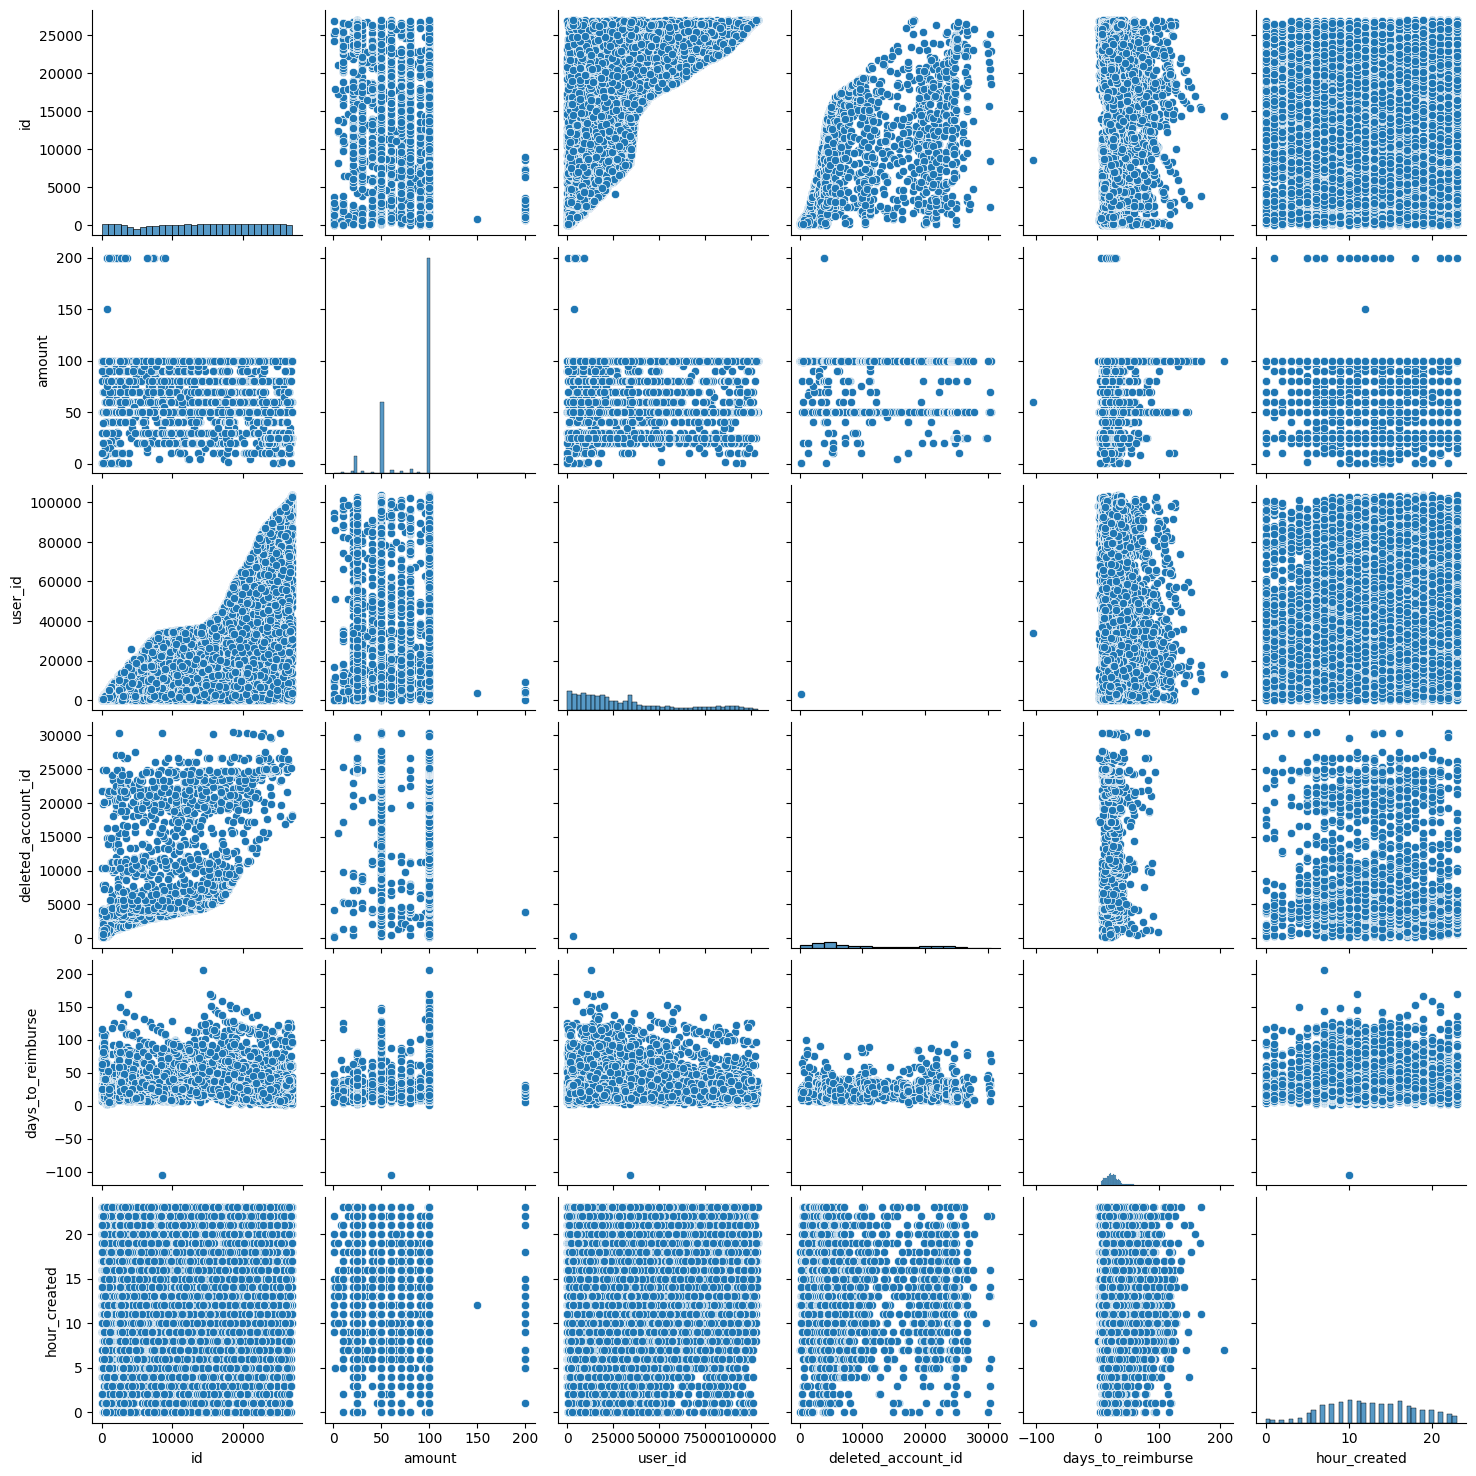

In [43]:
#EDA

sns.pairplot(cash)


In [52]:

# Extract year and month from the 'created_at' column and convert it to string format
cash['year_month'] = cash['created_at'].dt.to_period('M').astype(str)

# Count the number of cash requests per month
cash_requests_per_month = cash['year_month'].value_counts().reset_index()
cash_requests_per_month.columns = ['year_month', 'count']

# Create a bar chart
fig = px.bar(cash_requests_per_month, x='year_month', y='count', labels={'year_month': 'Year-Month', 'count': 'Number of Cash Requests'})
fig.show()

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_25835/216364401.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [56]:
#Now I would like to have an idea how much moneey per month IronHack was risking by leending to people

filtered_cash = cash[cash['status'].isin(['money_back', 'active', 'direct_debit_sent'])]
filtered_cash['year_month'] = filtered_cash['created_at'].dt.to_period('M').astype(str)

total_amount_per_month = filtered_cash.groupby('year_month')['amount'].sum().reset_index()



/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_25835/1248438973.py:4: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_25835/1248438973.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
fig = px.bar(total_amount_per_month, x='year_month', y='amount', labels={'year_month': 'Year-Month', 'amount': 'Total Amount'})
fig.show()

In [8]:
#Convertir fechas a typo date 
cash['created_at'] = pd.to_datetime(cash['created_at'])
cash['updated_at'] = pd.to_datetime(cash['updated_at'])
cash['moderated_at'] = pd.to_datetime(cash['moderated_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['reimbursement_date']=pd.to_datetime(cash['reimbursement_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['reco_last_update']=pd.to_datetime(cash['reco_last_update'])
cash['reco_creation'] = pd.to_datetime(cash['reco_creation'])
cash['cash_request_received_date'] = pd.to_datetime(cash['cash_request_received_date'])
cash['money_back_date'] = pd.to_datetime(cash['money_back_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['send_at'] = pd.to_datetime(cash['send_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

In [9]:
# Extraer el mes de creación y el mes de reembolso para cada solicitud de efectivo
cash['created_month'] = cash['created_at'].dt.to_period('M')
cash['reimbursement_month'] = cash['reimbursement_date'].dt.to_period('M')


/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_25835/2078967703.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['created_month'] = cash['created_at'].dt.to_period('M')
/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_25835/2078967703.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['reimbursement_month'] = cash['reimbursement_date'].dt.to_period('M')


In [12]:
cash['created_month'] = cash['created_at'].dt.to_period('M')
cash['updated_month'] = cash['updated_at'].dt.to_period('M')
cash['created_day_of_week'] = cash['created_at'].dt.day_name()

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_25835/3215595500.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['created_month'] = cash['created_at'].dt.to_period('M')
/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_25835/3215595500.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['updated_month'] = cash['updated_at'].dt.to_period('M')


In [34]:
day_of_week_counts = cash.groupby(['created_day_of_week']).size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

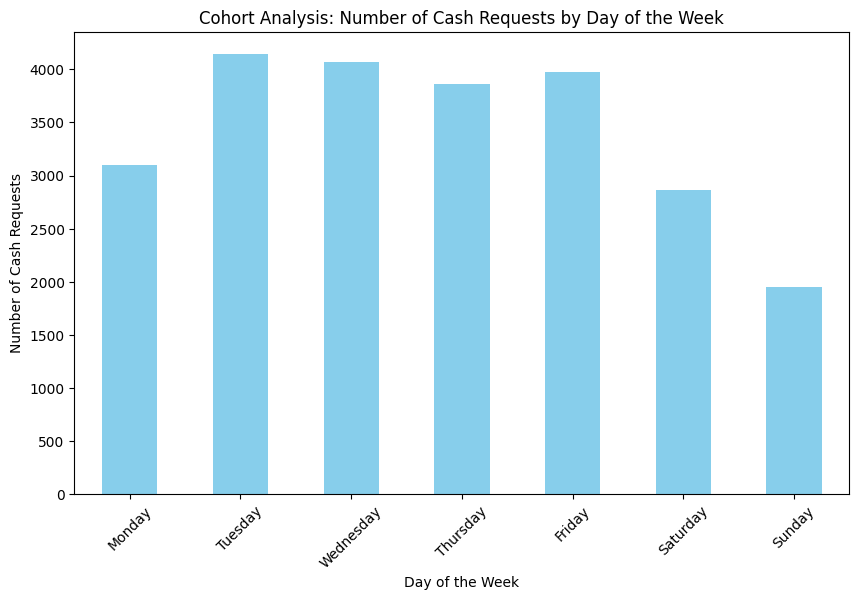

In [35]:
# Plot the cohort analysis by day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('Cohort Analysis: Number of Cash Requests by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cash Requests')
plt.xticks(rotation=45)
plt.show()

In [17]:
cash['created_at'] = pd.to_datetime(cash['created_at'])
cash['reimbursement_date'] = pd.to_datetime(cash['reimbursement_date'])


In [18]:
cash['days_to_reimburse'] = (cash['reimbursement_date'] - cash['created_at']).dt.days

In [30]:
def categorize_time_of_day(hour):
    if 7 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

In [31]:
cash['time_of_day'] = cash['created_at'].dt.hour.apply(categorize_time_of_day)

In [21]:
cash.sample(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,send_at,recovery_status,reco_creation,reco_last_update,created_month,reimbursement_month,updated_month,created_day_of_week,days_to_reimburse,time_of_day
2245,3882,50.0,rejected,2020-06-18 09:24:51.186763+00:00,2020-06-18 10:17:36.941320+00:00,NaN,NaT,1991.0,NaT,NaT,...,NaT,NaN,NaT,NaT,2020-06,NaT,2020-06,Thursday,NaN,morning
11444,5053,100.0,money_back,2020-06-24 22:17:27.087156+00:00,2020-12-18 13:09:06.333605+00:00,19466.0,NaT,NaN,2020-07-03 22:00:00+00:00,2020-06-30,...,NaT,NaN,NaT,NaT,2020-06,2020-07,2020-12,Wednesday,8.0,night
4636,12074,100.0,rejected,2020-08-11 20:51:44.204660+00:00,2020-08-12 09:58:17.765388+00:00,16891.0,NaT,NaN,2020-08-31 22:00:00+00:00,NaT,...,NaT,NaN,NaT,NaT,2020-08,2020-08,2020-08,Tuesday,20.0,evening
8269,10585,100.0,direct_debit_rejected,2020-08-02 16:47:53.731867+00:00,2020-10-10 22:26:24.599619+00:00,22570.0,NaT,NaN,2020-08-28 22:00:00+00:00,2020-08-03,...,NaT,pending,2020-09-03 22:29:29.605414+00:00,2020-10-10 22:26:24.608976+00:00,2020-08,2020-08,2020-10,Sunday,26.0,afternoon
12953,10640,50.0,money_back,2020-08-03 08:11:16.359617+00:00,2020-12-18 13:09:37.830046+00:00,35244.0,NaT,NaN,2020-08-26 22:00:00+00:00,2020-08-05,...,NaT,NaN,NaT,NaT,2020-08,2020-08,2020-12,Monday,23.0,morning


In [40]:
cohort_analysis = cash.groupby('time_of_day').size().sort_values()


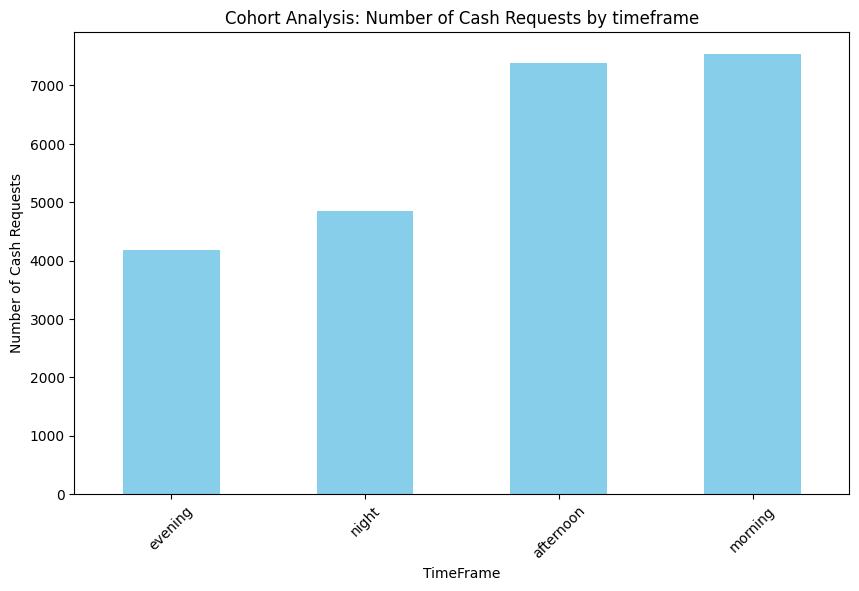

In [41]:
# Plot the cohort analysis by day of the week
plt.figure(figsize=(10, 6))
cohort_analysis.plot(kind='bar', color='skyblue')
plt.title('Cohort Analysis: Number of Cash Requests by timeframe')
plt.xlabel('TimeFrame')
plt.ylabel('Number of Cash Requests')
plt.xticks(rotation=45)
plt.show()

In [24]:
#Creating new column 
cash['hour_created'] = cash['created_at'].dt.hour


In [38]:
# Group by hour_created 
cohort_analysis2 = cash.groupby('hour_created').size()

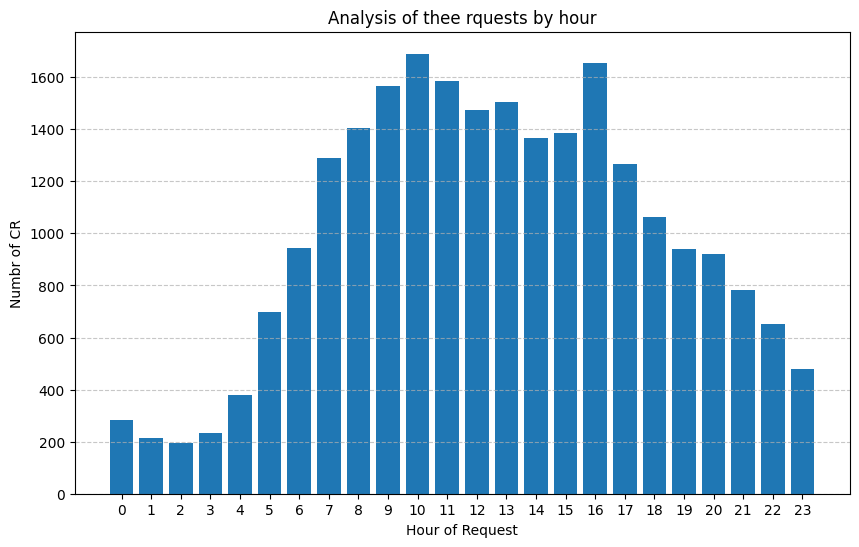

In [42]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cohort_analysis2.index, cohort_analysis2.values)
plt.xlabel('Hour of Request')
plt.ylabel('Numbr of CR')
plt.title('Analysis of thee rquests by hour')
plt.xticks(range(24))  # Show all hours
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()